In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [2]:
ldir = os.chdir(r'C:\Users\Gergely\Documents\Datasets')
df = pd.read_csv('Titanic.csv')

In [3]:
df.head()

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived
0,1,22.0,7.2500,0,1,0,3,2.0,0
1,2,38.0,71.2833,1,1,0,1,0.0,1
2,3,26.0,7.9250,1,0,0,3,2.0,1
3,4,35.0,53.1000,1,1,0,1,2.0,1
4,5,35.0,8.0500,0,0,0,3,2.0,0


In [4]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, 1:8]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [5]:
feature_names = list(X.columns)
feature_names

['Age', 'Fare', 'Sex', 'sibsp', 'Parch', 'Pclass', 'Embarked']

In [6]:
X.head()

,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked
0,22.0,7.2500,0,1,0,3,2.0
1,38.0,71.2833,1,1,0,1,0.0
2,26.0,7.9250,1,0,0,3,2.0
3,35.0,53.1000,1,1,0,1,2.0
4,35.0,8.0500,0,0,0,3,2.0


### Gradient Boosting

In [7]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

0.7939814814814815

### Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=0).fit(X_train, y_train)
logreg.score(X_test, y_test)

0.7777777777777778

### Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(random_state=0, max_depth=3, min_samples_split=8).fit(X_train, y_train)
tree_model.score(X_test, y_test)

0.7893518518518519

### Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=200, max_depth=3, max_features=5, random_state=0).fit(X_train, y_train)
forest.score(X_test, y_test)

0.7939814814814815

### Csak Gradient Boosthoz

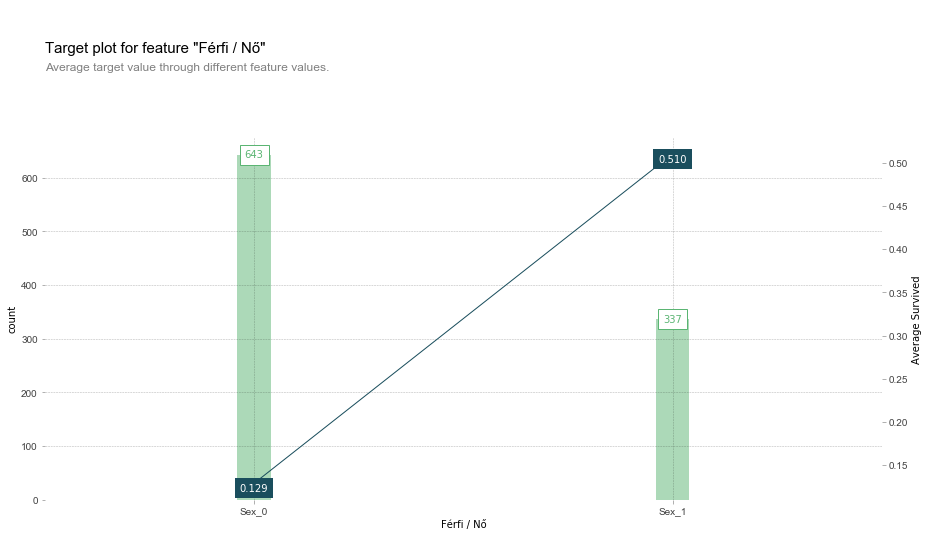

In [11]:
from pdpbox import pdp, info_plots

train_df, test_df = train_test_split(df, test_size=0.25, random_state=0)

fig, axes, summary_df = info_plots.target_plot(
df=train_df, feature='Sex', feature_name='Férfi / Nő', target='Survived', show_percentile=True)

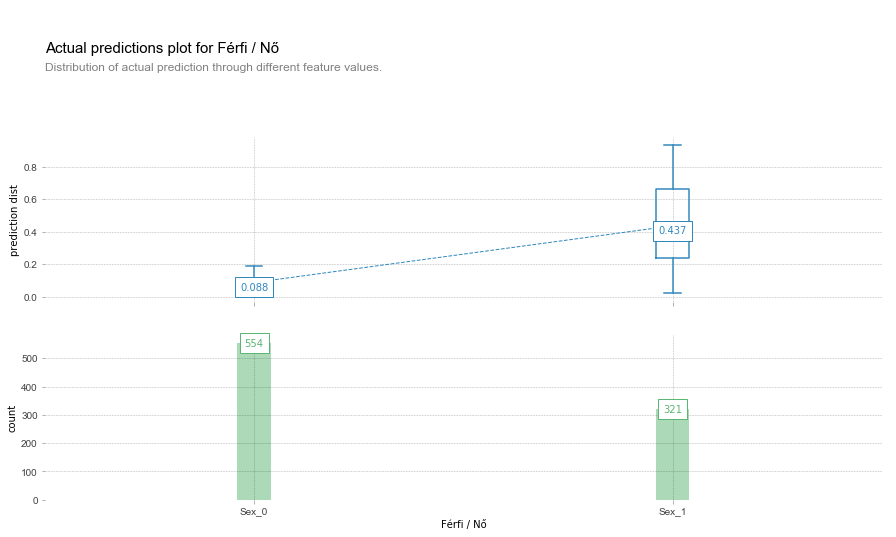

In [12]:
fig, axes, summary_df = info_plots.actual_plot(
model=clf, X=X_train, feature='Sex', feature_name='Férfi / Nő', predict_kwds={})

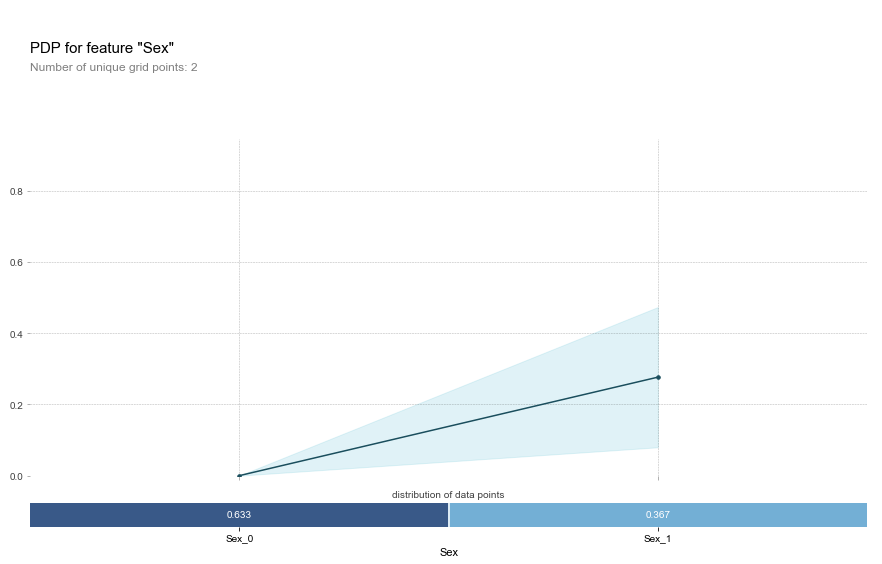

In [13]:
pdp_fare = pdp.pdp_isolate(model=clf, dataset=X_train, model_features=X_train.columns, feature='Sex')

fig, axes = pdp.pdp_plot(pdp_fare, 'Sex', plot_pts_dist=True)

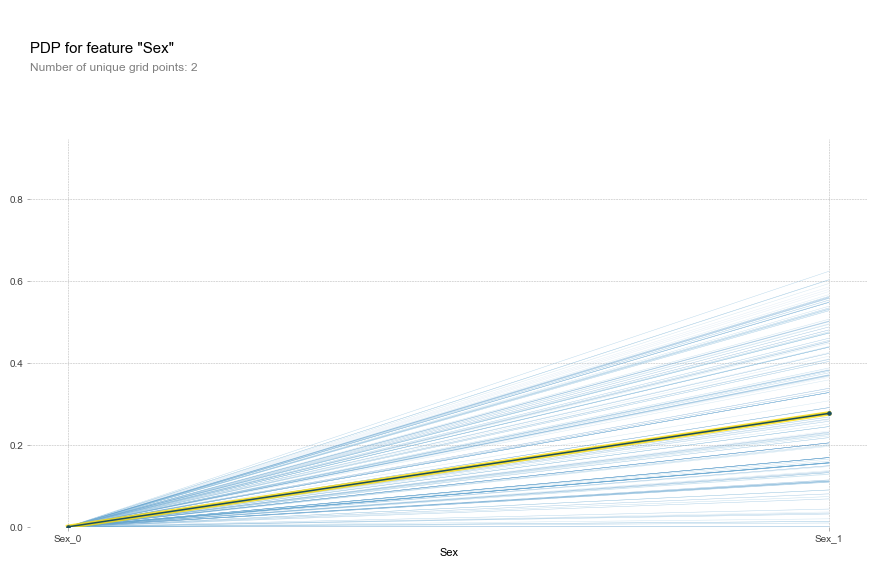

In [14]:
pdp_limit = pdp.pdp_isolate(model=clf, dataset=X_train, model_features=X_train.columns, feature='Sex')

fig, axes = pdp.pdp_plot(
pdp_limit, 'Sex', frac_to_plot=0.2, plot_lines=True, x_quantile=True, show_percentile=True)

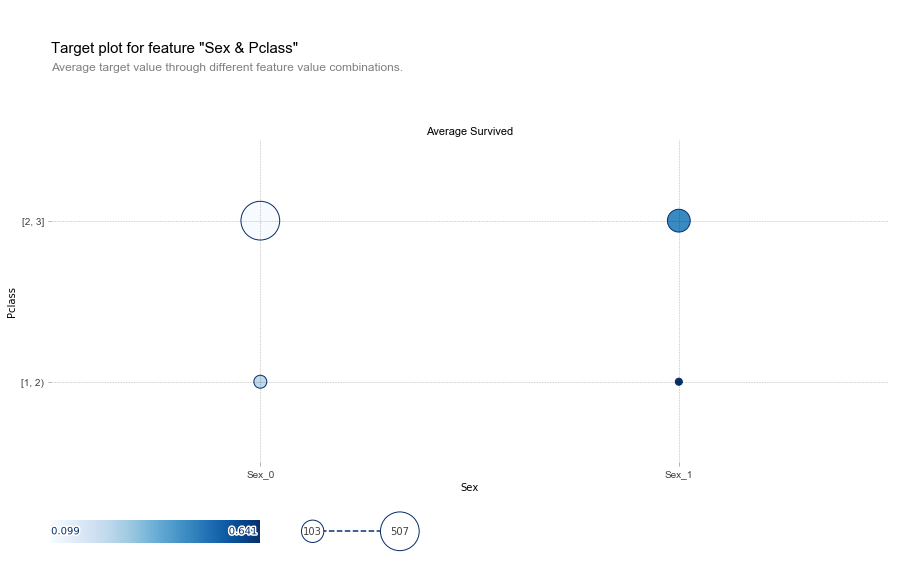

In [15]:
fig, axes, summary_df = info_plots.target_plot_interact(
df=train_df, features=['Sex', 'Pclass'], feature_names=['Sex', 'Pclass'], target='Survived')

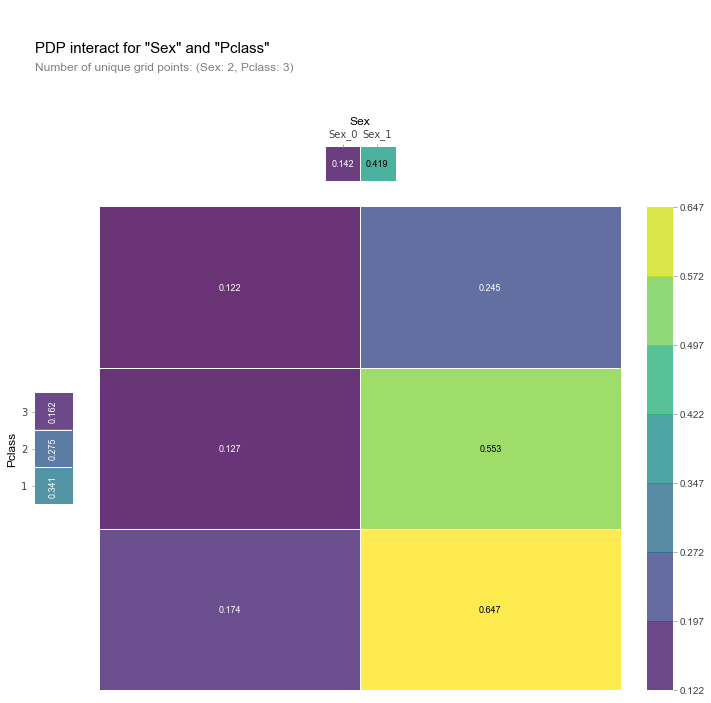

In [16]:
inter1 = pdp.pdp_interact(model=clf, dataset=X_train, model_features=X_train.columns, features=['Sex', 'Pclass'])
 
fig, axes = pdp.pdp_interact_plot(
pdp_interact_out = inter1, feature_names=['Sex', 'Pclass'], plot_type='grid', x_quantile=True, plot_pdp=True)

### Bármihez

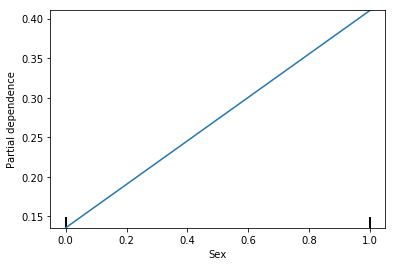

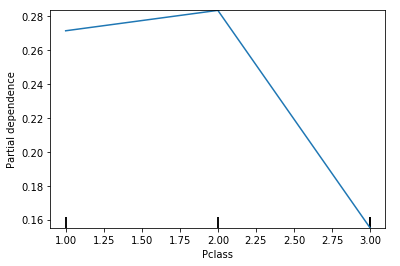

In [17]:
from sklearn.inspection import plot_partial_dependence

plot_partial_dependence(tree_model, X_train, features=['Sex'])
plot_partial_dependence(tree_model, X_train, features=['Pclass'])

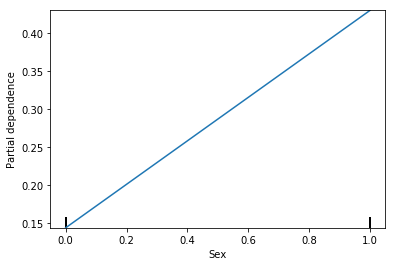

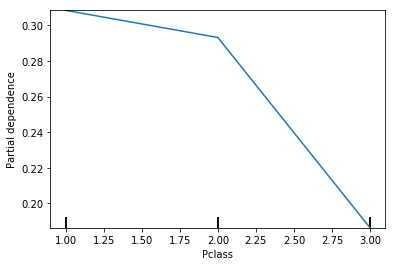

In [18]:
plot_partial_dependence(forest, X_train, features=['Sex'])
plot_partial_dependence(forest, X_train, features=['Pclass'])

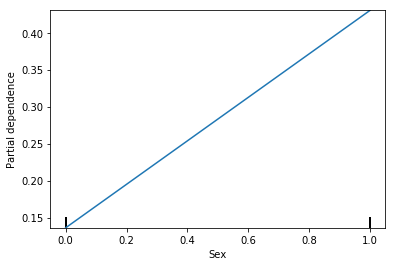

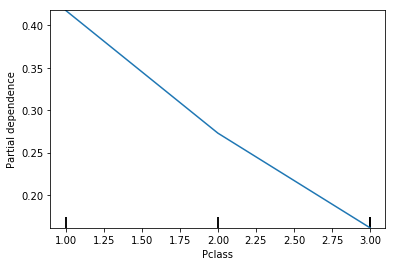

In [19]:
plot_partial_dependence(logreg, X_train, features=['Sex'])
plot_partial_dependence(logreg, X_train, features=['Pclass'])

### Pycebox - Individual conditional expectation (ICE)

In [20]:
from pycebox.ice import ice, ice_plot

ice_df = ice(X_train, 'Pclass', logreg.predict)
ice_df.head()

data_Pclass      1.0                                                        \
Age            0.92     4.00     6.00     11.00    13.00    14.00    15.00   
Fare        151.5500 81.8583  134.5000 120.0000 262.3750 120.0000 211.3375   
Sex              0.0      0.0      0.0      0.0      0.0      1.0      1.0   
sibsp            1.0      0.0      0.0      1.0      2.0      1.0      0.0   
Parch            2.0      2.0      2.0      2.0      2.0      2.0      1.0   
Embarked         2.0      2.0      0.0      2.0      0.0      2.0      2.0   
Pclass                                                                       
1                  0        0        0        0        0        1        1   
2                  0        0        0        0        0        1        1   
3                  0        0        0        0        0        0        0   

data_Pclass                             ...      3.0                    \
Age            16.00    17.00    18.00  ...    45.00    45.50    47.00   
Fare        39.4000  57.0000  53.1000   ... 27.9000  7.2250   7.0000     
Sex              1.0      1.0      1.0  ...      1.0      0.0      1.0   
sibsp            0.0      1.0      1.0  ...      1.0      0.0      1.0   
Parch            1.0      0.0      0.0  ...      4.0      0.0      0.0   
Embarked         2.0      2.0      2.0  ...      2.0      0.0      2.0   
Pclass                                  ...                              
1                  1        1        1  ...        1        0        1   
2                  1        1        1  ...        0        0        0   
3                  0        0        0  ...        0        0        0   

data_Pclass                                                                 
Age                              48.00    55.50    59.00    60.50    65.00  
Fare        9.0000   14.5000  34.3750  8.0500   7.2500   14.4542  7.7500    
Sex              0.0      1.0      1.0      0.0      0.0      0.0      0.0  
sibsp            0.0      1.0      1.0      0.0      0.0      0.0      0.0  
Parch            0.0      0.0      3.0      0.0      0.0      0.0      0.0  
Embarked         2.0      2.0      2.0      2.0      2.0      2.0      1.0  
Pclass                                                                      
1                  0        1        1        0        0        0        0  
2                  0        0        0        0        0        0        0  
3                  0        0        0        0        0        0        0  

[3 rows x 746 columns]

Text(0.5, 1.0, 'ICE curves')

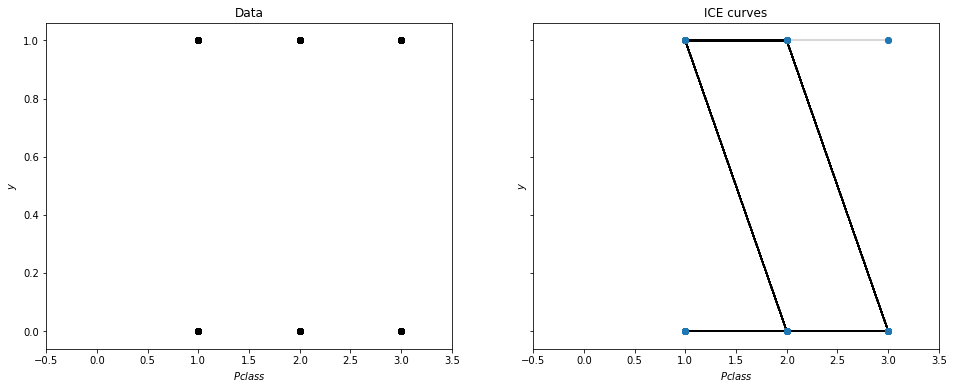

In [21]:
fig, (data_ax, ice_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(16, 6))

data_ax.scatter(df.Pclass, y, c='k', alpha=0.5)

data_ax.set_xlim(-0.5, 3.5)
data_ax.set_xlabel('$Pclass$')
data_ax.set_ylabel('$y$')
data_ax.set_title('Data')

ice_plot(ice_df, c='k', alpha=0.1, ax=ice_ax, plot_points=True)

ice_ax.set_xlabel('$Pclass$')
ice_ax.set_ylabel('$y$')
ice_ax.set_title('ICE curves')

[Text(418.5, 332.955, 'Sex <= 0.5\ngini = 0.372\nsamples = 875\nvalue = [659, 216]\nclass = túlélte'),
 Text(209.25, 237.825, 'Age <= 12.5\ngini = 0.223\nsamples = 554\nvalue = [483, 71]\nclass = túlélte'),
 Text(104.625, 142.695, 'sibsp <= 2.5\ngini = 0.494\nsamples = 27\nvalue = [12, 15]\nclass = nem élte túl'),
 Text(52.3125, 47.565, 'gini = 0.375\nsamples = 20\nvalue = [5, 15]\nclass = nem élte túl'),
 Text(156.9375, 47.565, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]\nclass = túlélte'),
 Text(313.875, 142.695, 'Fare <= 52.277\ngini = 0.19\nsamples = 527\nvalue = [471, 56]\nclass = túlélte'),
 Text(261.5625, 47.565, 'gini = 0.153\nsamples = 467\nvalue = [428, 39]\nclass = túlélte'),
 Text(366.1875, 47.565, 'gini = 0.406\nsamples = 60\nvalue = [43, 17]\nclass = túlélte'),
 Text(627.75, 237.825, 'Pclass <= 2.5\ngini = 0.495\nsamples = 321\nvalue = [176, 145]\nclass = túlélte'),
 Text(523.125, 142.695, 'Age <= 58.5\ngini = 0.479\nsamples = 169\nvalue = [67, 102]\nclass = nem élte túl'),


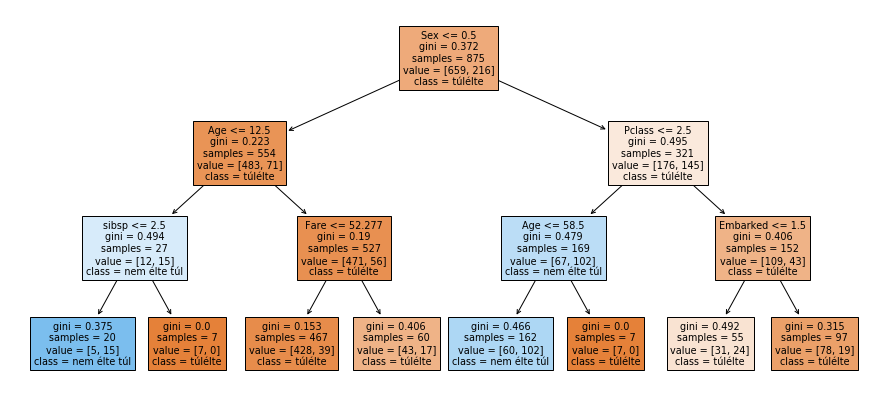

In [37]:
from sklearn import tree

plt.figure(figsize=(15, 7))
tree.plot_tree(tree_model, filled=True, feature_names=X.columns, class_names=['túlélte', 'nem élte túl'])